In [1]:
%cd /content/drive/MyDrive/ML/YOLO

/content/drive/MyDrive/ML/YOLO


In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
from ultralytics.solutions import object_counter

In [4]:
model = YOLO("./runs/pylon/train/v18/weights/best.pt")

In [5]:
import cv2
from PIL import Image
import numpy as np

In [6]:
gif = cv2.VideoCapture('/content/drive/MyDrive/ML/YOLO/orig2.gif')
fps = gif.get(cv2.CAP_PROP_FPS)

In [7]:
predicts = []
while True:
    is_success, image_src = gif.read()
    if not is_success:
        break
    pred = model.predict(image_src)[0]
    object_count = str(pred.verbose()[0:-2])
    object_count = object_count.replace('nutss', 'nuts')
    pred_im = pred.plot()
    im = Image.fromarray(pred_im[..., ::-1])
    im_np = np.array(im)
    cv2.putText(im_np, object_count, (880, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 0), 2)
    im_with_text = Image.fromarray(im_np)
    predicts.append(im_with_text)


0: 384x640 1 seed, 187.3ms
Speed: 4.5ms preprocess, 187.3ms inference, 822.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 seeds, 48.0ms
Speed: 3.2ms preprocess, 48.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.4ms
Speed: 1.8ms preprocess, 49.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 seeds, 48.1ms
Speed: 3.4ms preprocess, 48.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 seeds, 40.4ms
Speed: 3.3ms preprocess, 40.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 seeds, 39.5ms
Speed: 2.8ms preprocess, 39.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 seeds, 1 nuts, 37.7ms
Speed: 3.4ms preprocess, 37.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 seeds, 32.4ms
Speed: 1.7ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shap

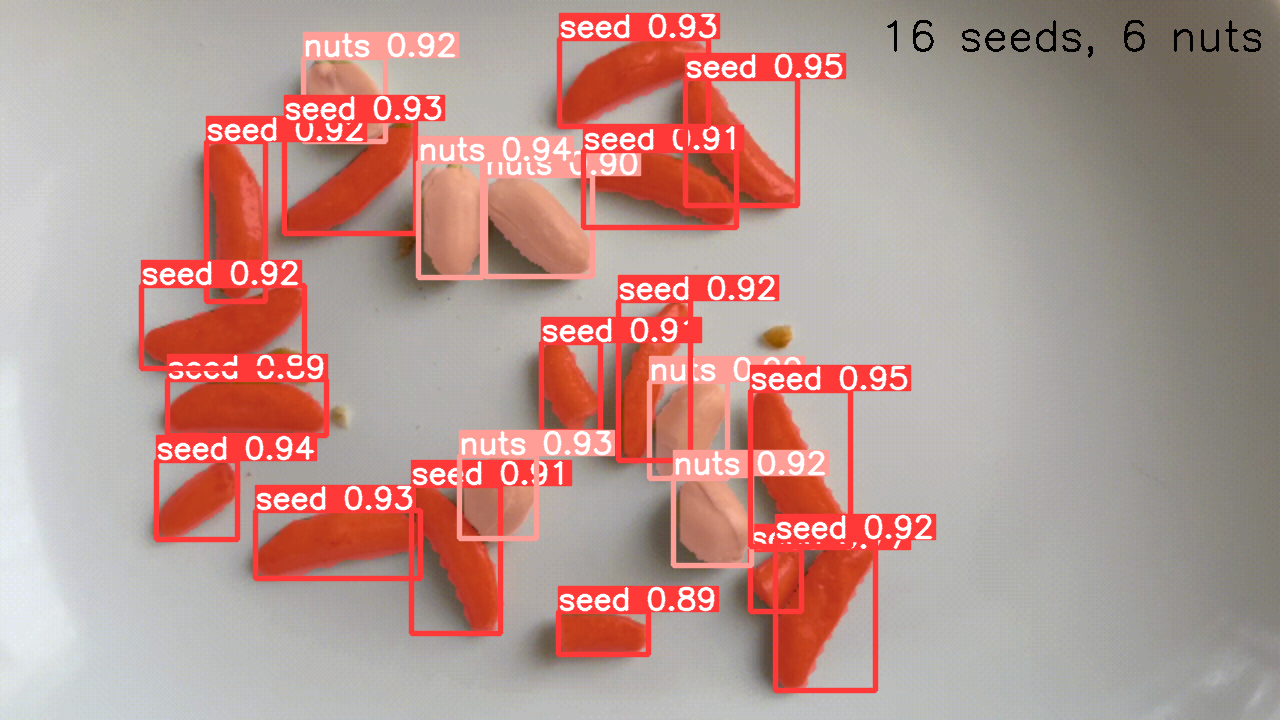

In [8]:
predicts[-1]

In [9]:
predicts[0].save('/content/drive/MyDrive/ML/YOLO/segmentation.gif',save_all=True, append_images=predicts[1:], optimize=False, duration=100, loop=0)